In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 1. 데이터 준비

digits = datasets.load_digits()
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))  # 8x8 -> 64
y = digits.target

# 정규화 (0~16 -> 0~1)
X = X / 16.0

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# one-hot 인코딩
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [ ]:
# 2. 모델 구성

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),   # 첫 번째 레이어에서 입력 모양 정의
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y_train.shape[1], activation="softmax")
])

In [ ]:
# 모델 컴파일

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [ ]:
# 학습

history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    epochs=20,     # 학습 곡선 확인용
    batch_size=16,
    verbose=1
)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1928 - loss: 2.2387 - val_accuracy: 0.6771 - val_loss: 1.7409
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5333 - loss: 1.6615 - val_accuracy: 0.8160 - val_loss: 0.9660
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7405 - loss: 0.9776 - val_accuracy: 0.8021 - val_loss: 0.6283
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8079 - loss: 0.6575 - val_accuracy: 0.8889 - val_loss: 0.4762
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8307 - loss: 0.5450 - val_accuracy: 0.9062 - val_loss: 0.3813
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9020 - loss: 0.4005 - val_accuracy: 0.9097 - val_loss: 0.3379
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8883 - loss: 0.3635 - val_accuracy: 0.9306 - val_loss: 0.2895
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8982 - loss: 0.3402 - val_accuracy: 0.9410 - val_loss:

In [ ]:
# 예측

y_pred = model.predict(X_test)
y_test_class = np.argmax(Y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


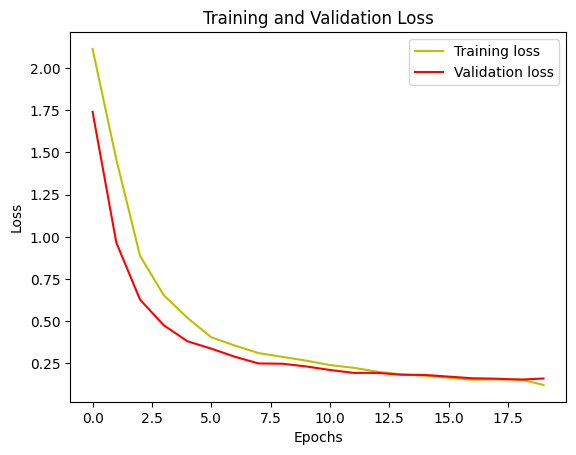

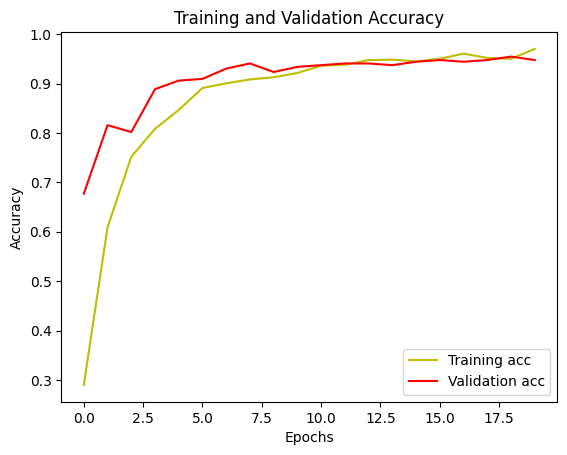

In [ ]:
# 손실함수 시각화

plt.plot(history.history['loss'], 'y', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도함수 시각화
plt.plot(history.history['accuracy'], 'y', label='Training acc')
plt.plot(history.history['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# 분류 성능 평가

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.93      0.93      0.93        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.96      0.90      0.93        30
           9       0.88      0.93      0.90        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  2]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0